<a href="https://colab.research.google.com/github/Hanamoongit/Hanamoongit/blob/main/reproducible_notebooks/BigData_MapReduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data - Map Reduce mit Pyton - Textmining
### Google Colab Example


### Google Colab Example

*   Listeneintrag
*   Listeneintrag



* Text Mining ist ein Verfahren zur Analyse von Texten mit dem Ziel, relevante Informationen zu extrahieren, Muster zu erkennen und Zusammenhänge zu identifizieren.
* Text Mining ist insbesondere im Bereich von Natural Language Processing (NLP) angesiedelt.
* Auch hier kann das CRSIP-DM-Modell angewendet werden.

Relevante Begriffe:
* Word Count: Einfache Zählung der Wörter in einem df (Teil der deskriptiven Analyse).
* Token: Wörter oder Sätzzeichen in einem Text.
* Tokenization: Prozess der  Zerlegung eines Textes in einzelne Wörter oder Satzzeichen
* Bag of Words (BoW): Sammlung von Tokens.
* Part-of-Speech (PoS) Tagging: Weist jedem Wort seine grammatikalische Rolle (Substantiv, Verb, Adjektiv etc.) zu.
* Lemmatization: reduziert Wörter auf ihre Grundform (Lemma), um Wortvarianten zusammenzuführen.
* Stemming: reduziert Wörter auf den Wortstamm (Stem).

![0_6k_6zouDWBMWkehE.webp](attachment:5324e772-9ed1-46d5-b8f9-7c2002e4b30e.webp)

Quelle: https://nirajbhoi.medium.com/stemming-vs-lemmatization-in-nlp-efc280d4e845.

Bibliotheken:

1. NLTK (Natural Language Toolkit)
    * Eine der ältesten NLP-Bibliotheken
    * Enthält Funktionen für Tokenization, Stemming, Lemmatization, POS Tagging, uvm
    * Eher für akademische Forschung
    * https://www.nltk.org/index.html
2. **SpaCy**
    * Effizienter als NLTK
    * Vorgefertigte Modelle für mehrere Sprachen (inkl. Deutsch)
    * https://spacy.io/
3. TextBlob
    * NLP-Bibliothek auf Basis von NLTK und scikit-learn
    * Unterstützt Sentiment Analysis, Spracherkennung und Korrekturlesen
    * https://textblob.readthedocs.io/en/dev/#
4. Scikit-learn (Feature Extraction für Text)
    * Ideal für Machine Learning-gestützte Textanalyse wie Textklassifikation oder Themenmodellierung.
    * https://scikit-learn.org/1.4/tutorial/text_analytics/working_with_text_data.html
5. WordCloud
    * Erzeugt Wortwolken aus Texten
    * Ideal im Rahmen der deskriptiven Analyes
    * https://pypi.org/project/wordcloud/

# Wichtige Schritte im Text Mining, im Rahmen des Data Preprocessing

### Das Ziel im Preprocessing ist es, den Text in seine Textbausteine zu zerlegen und überflüssige Textbausteine, wie z.B. Sonderzeichen, Stoppwörter ... zu entfernen.

1. Normalisieren

Das Ziel ist es, Wörter vergleichbar machen. Das heißt Groß- und Kleinschreibung hat keinen Einfluss mehr, beim Wörter zählen nachher. Ob das Wort "ich" klein geschrieben ist, weil es innerhalb des Satzes steht oder "Ich" geschrieben ist, weil es am Satzanfang steht, spielt keine Rolle. Beim Zählen der Wörter nachher werden beide "ich" als ein und dasselbe Wort erkannt und nicht als 2 unterschiedliche Wörter.

![grafik.png](attachment:a67acd35-0d48-4e1b-9285-2b0d8ff1f5f0.png)

2. Text in Textbausteine zerlegen: Tokenization

* Als Ergebnis ist der Text in sogenannte tokens aufgeteilt. Jedes Zeichen ist also ein token.
* Beim Tokenizing kann auch zuerst in Sätze tokenisiert werden. Dann ist jeder Satz ein token.

![grafik.png](attachment:a97f1ccd-318f-4024-b930-beb6b5078257.png)

3. Entfernen von Sonderzeichen

* Als Ergebnis ist der Text in sogenannte tokens aufgeteilt. Jedes Zeichen ist also ein token.
* Beim Tokenizing kann auch zuerst in Sätze tokenisiert werden. Dann ist jeder Satz ein token.

![grafik.png](attachment:2fe6ad0a-5a69-4a0c-a793-e3b804c40d56.png)

4. Entfernen von Zahlen

![grafik.png](attachment:70f0fc03-12b0-44b5-a745-57872c6f6c1c.png)

5. Entfernen von Stopwords (wie z.B. und, aber, auch...)

![grafik.png](attachment:2b19ce9c-ab94-4115-818b-d6b3e76110c2.png)

In [ ]:
import sys
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud

In [ ]:
from collections import Counter # ist bereits Teil der Standard Bibliothek in Python

In [ ]:
#!pip install --upgrade --force-reinstall spacy

In [ ]:
import spacy # !pip install spacy

Spacy importieren

In [ ]:
from spacy.lang.de import German  # Duden

In [ ]:
nlp = German()
nlp

In [ ]:
goethe_text = (
    "1 Habe nun, ach! Philosophie,\n"
    "2 Juristerei und Medizin,\n"
    "3 Und leider auch Theologie\n"
    "4 Durchaus studiert, mit heißem Bemühn.\n"
    "5 Da steh ich nun, ich armer Tor!\n"
    "6 Und bin so klug als wie zuvor;\n"
    "7 Heiße Magister, heiße Doktor gar\n"
    "8 Und ziehe schon an die zehen Jahr\n"
    "9 Herauf, herab und quer und krumm\n"
    "10 Meine Schüler an der Nase herum –\n"
    "11 Und sehe, daß wir nichts wissen können!\n"
    "12 Das will mir schier das Herz verbrennen.\n"
    "13 Zwar bin ich gescheiter als all die Laffen,\n"
    "14 Doktoren, Magister, Schreiber und Pfaffen;\n"
    "15 Mich plagen keine Skrupel noch Zweifel,\n"
    "16 Fürchte mich weder vor Hölle noch Teufel –\n"
    "17 Dafür ist mir auch alle Freud entrissen,\n"
    "18 Bilde mir nicht ein, was Rechts zu wissen,\n"
    "19 Bilde mir nicht ein, ich könnte was lehren,\n"
    "20 Die Menschen zu bessern und zu bekehren.\n"
    "21 Auch hab ich weder Gut noch Geld,\n"
    "22 Noch Ehr und Herrlichkeit der Welt;\n"
    "23 Es möchte kein Hund so länger leben!\n"
    "24 Drum hab ich mich der Magie ergeben,\n"
    "25 Ob mir durch Geistes Kraft und Mund\n"
    "26 Nicht manch Geheimnis würde kund;\n"
    "27 Daß ich nicht mehr mit saurem Schweiß\n"
    "28 Zu sagen brauche, was ich nicht weiß;\n"
    "29 Daß ich erkenne, was die Welt\n"
    "30 Im Innersten zusammenhält,\n"
    "31 Schau alle Wirkenskraft und Samen,\n"
    "32 Und tu nicht mehr in Worten kramen."
)
print(goethe_text)

1 Habe nun, ach! Philosophie,
2 Juristerei und Medizin,
3 Und leider auch Theologie
4 Durchaus studiert, mit heißem Bemühn.
5 Da steh ich nun, ich armer Tor!
6 Und bin so klug als wie zuvor;
7 Heiße Magister, heiße Doktor gar
8 Und ziehe schon an die zehen Jahr
9 Herauf, herab und quer und krumm
10 Meine Schüler an der Nase herum –
11 Und sehe, daß wir nichts wissen können!
12 Das will mir schier das Herz verbrennen.
13 Zwar bin ich gescheiter als all die Laffen,
14 Doktoren, Magister, Schreiber und Pfaffen;
15 Mich plagen keine Skrupel noch Zweifel,
16 Fürchte mich weder vor Hölle noch Teufel –
17 Dafür ist mir auch alle Freud entrissen,
18 Bilde mir nicht ein, was Rechts zu wissen,
19 Bilde mir nicht ein, ich könnte was lehren,
20 Die Menschen zu bessern und zu bekehren.
21 Auch hab ich weder Gut noch Geld,
22 Noch Ehr und Herrlichkeit der Welt;
23 Es möchte kein Hund so länger leben!
24 Drum hab ich mich der Magie ergeben,
25 Ob mir durch Geistes Kraft und Mund
26 Nicht manch Geheim

In [ ]:
# klein schreiben

kleinschrift = goethe_text.lower()
print(kleinschrift)

1 habe nun, ach! philosophie,
2 juristerei und medizin,
3 und leider auch theologie
4 durchaus studiert, mit heißem bemühn.
5 da steh ich nun, ich armer tor!
6 und bin so klug als wie zuvor;
7 heiße magister, heiße doktor gar
8 und ziehe schon an die zehen jahr
9 herauf, herab und quer und krumm
10 meine schüler an der nase herum –
11 und sehe, daß wir nichts wissen können!
12 das will mir schier das herz verbrennen.
13 zwar bin ich gescheiter als all die laffen,
14 doktoren, magister, schreiber und pfaffen;
15 mich plagen keine skrupel noch zweifel,
16 fürchte mich weder vor hölle noch teufel –
17 dafür ist mir auch alle freud entrissen,
18 bilde mir nicht ein, was rechts zu wissen,
19 bilde mir nicht ein, ich könnte was lehren,
20 die menschen zu bessern und zu bekehren.
21 auch hab ich weder gut noch geld,
22 noch ehr und herrlichkeit der welt;
23 es möchte kein hund so länger leben!
24 drum hab ich mich der magie ergeben,
25 ob mir durch geistes kraft und mund
26 nicht manch geheim

In [ ]:
# dem nlp object den zu analysierenden string übergeben
# Ergebnis ist das Doc Objekt
# ich verwende im nachfolgenden anstelle von doc my_tokens, denn die stecken in dem doc Objekt
# in der Dokumentation/Fehlermeldungen findest du aber an dieser Stelle immer die Variable doc
spacy_tokens = nlp(kleinschrift)  # tokenization --> Attribute Vergabe (Stoppwort, Zahl, Leerzeichen..)
type(spacy_tokens) # Doc objekt

spacy.tokens.doc.Doc

In [ ]:
# um die einzelnen tokens anzeigen zu lassen, iteriere ich über die liste
# das attribute .text gibt uns den text des tokens wieder
for token in spacy_tokens:
    print(token.text)

1
habe
nun
,
ach
!
philosophie
,


2
juristerei
und
medizin
,


3
und
leider
auch
theologie


4
durchaus
studiert
,
mit
heißem
bemühn
.


5
da
steh
ich
nun
,
ich
armer
tor
!


6
und
bin
so
klug
als
wie
zuvor
;


7
heiße
magister
,
heiße
doktor
gar


8
und
ziehe
schon
an
die
zehen
jahr


9
herauf
,
herab
und
quer
und
krumm


10
meine
schüler
an
der
nase
herum
–


11
und
sehe
,
daß
wir
nichts
wissen
können
!


12
das
will
mir
schier
das
herz
verbrennen
.


13
zwar
bin
ich
gescheiter
als
all
die
laffen
,


14
doktoren
,
magister
,
schreiber
und
pfaffen
;


15
mich
plagen
keine
skrupel
noch
zweifel
,


16
fürchte
mich
weder
vor
hölle
noch
teufel
–


17
dafür
ist
mir
auch
alle
freud
entrissen
,


18
bilde
mir
nicht
ein
,
was
rechts
zu
wissen
,


19
bilde
mir
nicht
ein
,
ich
könnte
was
lehren
,


20
die
menschen
zu
bessern
und
zu
bekehren
.


21
auch
hab
ich
weder
gut
noch
geld
,


22
noch
ehr
und
herrlichkeit
der
welt
;


23
es
möchte
kein
hund
so
länger
leben
!


24
drum
hab
ich
mich
der
m

In [ ]:
# welche Sonderzeichen sind im text enthalten?
# hierfür nutze ich die Info, dass alle tokens intern die info besitzen, ob sie ein is_punct sind

for token in spacy_tokens:
    if token.is_punct:
        print(token)

,
!
,
,
,
.
,
!
;
,
,
–
,
!
.
,
,
,
;
,
–
,
,
,
,
,
.
,
;
!
,
;
,
;
,
,
,
.


In [ ]:
# ich will keine tokens die sonderzeichen sind

spacy_tokens_os = []

for token in spacy_tokens:
    if not token.is_punct:
        spacy_tokens_os.append(token)

In [ ]:
# check, ob funktioniert
spacy_tokens_os

[1,
 habe,
 nun,
 ach,
 philosophie,
 ,
 2,
 juristerei,
 und,
 medizin,
 ,
 3,
 und,
 leider,
 auch,
 theologie,
 ,
 4,
 durchaus,
 studiert,
 mit,
 heißem,
 bemühn,
 ,
 5,
 da,
 steh,
 ich,
 nun,
 ich,
 armer,
 tor,
 ,
 6,
 und,
 bin,
 so,
 klug,
 als,
 wie,
 zuvor,
 ,
 7,
 heiße,
 magister,
 heiße,
 doktor,
 gar,
 ,
 8,
 und,
 ziehe,
 schon,
 an,
 die,
 zehen,
 jahr,
 ,
 9,
 herauf,
 herab,
 und,
 quer,
 und,
 krumm,
 ,
 10,
 meine,
 schüler,
 an,
 der,
 nase,
 herum,
 ,
 11,
 und,
 sehe,
 daß,
 wir,
 nichts,
 wissen,
 können,
 ,
 12,
 das,
 will,
 mir,
 schier,
 das,
 herz,
 verbrennen,
 ,
 13,
 zwar,
 bin,
 ich,
 gescheiter,
 als,
 all,
 die,
 laffen,
 ,
 14,
 doktoren,
 magister,
 schreiber,
 und,
 pfaffen,
 ,
 15,
 mich,
 plagen,
 keine,
 skrupel,
 noch,
 zweifel,
 ,
 16,
 fürchte,
 mich,
 weder,
 vor,
 hölle,
 noch,
 teufel,
 ,
 17,
 dafür,
 ist,
 mir,
 auch,
 alle,
 freud,
 entrissen,
 ,
 18,
 bilde,
 mir,
 nicht,
 ein,
 was,
 rechts,
 zu,
 wissen,
 ,
 19,
 bilde,
 mir,
 nicht

In [ ]:
# welche zahlen sind im text enthalten?
# is_digit verwenden

for token in spacy_tokens_os:
    if token.is_digit:
        print(token)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [ ]:
spacy_tokens_cero_numbers = []

for token in spacy_tokens_os:
    if not token.is_digit:
        spacy_tokens_cero_numbers.append(token)

In [ ]:
spacy_tokens_cero_numbers

[habe,
 nun,
 ach,
 philosophie,
 ,
 juristerei,
 und,
 medizin,
 ,
 und,
 leider,
 auch,
 theologie,
 ,
 durchaus,
 studiert,
 mit,
 heißem,
 bemühn,
 ,
 da,
 steh,
 ich,
 nun,
 ich,
 armer,
 tor,
 ,
 und,
 bin,
 so,
 klug,
 als,
 wie,
 zuvor,
 ,
 heiße,
 magister,
 heiße,
 doktor,
 gar,
 ,
 und,
 ziehe,
 schon,
 an,
 die,
 zehen,
 jahr,
 ,
 herauf,
 herab,
 und,
 quer,
 und,
 krumm,
 ,
 meine,
 schüler,
 an,
 der,
 nase,
 herum,
 ,
 und,
 sehe,
 daß,
 wir,
 nichts,
 wissen,
 können,
 ,
 das,
 will,
 mir,
 schier,
 das,
 herz,
 verbrennen,
 ,
 zwar,
 bin,
 ich,
 gescheiter,
 als,
 all,
 die,
 laffen,
 ,
 doktoren,
 magister,
 schreiber,
 und,
 pfaffen,
 ,
 mich,
 plagen,
 keine,
 skrupel,
 noch,
 zweifel,
 ,
 fürchte,
 mich,
 weder,
 vor,
 hölle,
 noch,
 teufel,
 ,
 dafür,
 ist,
 mir,
 auch,
 alle,
 freud,
 entrissen,
 ,
 bilde,
 mir,
 nicht,
 ein,
 was,
 rechts,
 zu,
 wissen,
 ,
 bilde,
 mir,
 nicht,
 ein,
 ich,
 könnte,
 was,
 lehren,
 ,
 die,
 menschen,
 zu,
 bessern,
 und,
 zu,
 b

In [ ]:
# deutsche stopwords importieren
from spacy.lang.de.stop_words import STOP_WORDS

In [ ]:
# welche stopwords sind in dem text enthalten?
for token in spacy_tokens_cero_numbers:
    if token.is_stop:
        print(token)

habe
nun
ach
und
und
leider
auch
durchaus
mit
da
ich
nun
ich
und
bin
so
als
wie
gar
und
schon
an
die
jahr
und
und
meine
an
der
und
daß
wir
nichts
können
das
will
mir
das
zwar
bin
ich
als
die
und
mich
keine
noch
mich
vor
noch
dafür
ist
mir
auch
alle
mir
nicht
ein
was
zu
mir
nicht
ein
ich
könnte
was
die
zu
und
zu
auch
ich
gut
noch
noch
und
der
es
möchte
kein
so
ich
mich
der
ob
mir
durch
und
nicht
würde
daß
ich
nicht
mehr
mit
zu
was
ich
nicht
daß
ich
was
die
im
alle
und
und
nicht
mehr
in


In [ ]:
# stopwords entfernen

spacy_tokens_final = []

for token in spacy_tokens_cero_numbers:
    if not token.is_stop and token.text.strip() != "":  # Stopwörter & leere Token entfernen
        cleaned_text = token.text.replace("\n", " ")  # \n durch Leerzeichen ersetzen
        spacy_tokens_final.append(cleaned_text)  # Nur den bereinigten Text speichern

In [ ]:
spacy_tokens_final

['philosophie',
 'juristerei',
 'medizin',
 'theologie',
 'studiert',
 'heißem',
 'bemühn',
 'steh',
 'armer',
 'tor',
 'klug',
 'zuvor',
 'heiße',
 'magister',
 'heiße',
 'doktor',
 'ziehe',
 'zehen',
 'herauf',
 'herab',
 'quer',
 'krumm',
 'schüler',
 'nase',
 'herum',
 'sehe',
 'wissen',
 'schier',
 'herz',
 'verbrennen',
 'gescheiter',
 'all',
 'laffen',
 'doktoren',
 'magister',
 'schreiber',
 'pfaffen',
 'plagen',
 'skrupel',
 'zweifel',
 'fürchte',
 'weder',
 'hölle',
 'teufel',
 'freud',
 'entrissen',
 'bilde',
 'rechts',
 'wissen',
 'bilde',
 'lehren',
 'menschen',
 'bessern',
 'bekehren',
 'hab',
 'weder',
 'geld',
 'ehr',
 'herrlichkeit',
 'welt',
 'hund',
 'länger',
 'leben',
 'drum',
 'hab',
 'magie',
 'ergeben',
 'geistes',
 'kraft',
 'mund',
 'manch',
 'geheimnis',
 'kund',
 'saurem',
 'schweiß',
 'sagen',
 'brauche',
 'weiß',
 'erkenne',
 'welt',
 'innersten',
 'zusammenhält',
 'schau',
 'wirkenskraft',
 'samen',
 'tu',
 'worten',
 'kramen']

In [ ]:
dict_count = Counter(spacy_tokens_final)
dict_count

Counter({'philosophie': 1,
         'juristerei': 1,
         'medizin': 1,
         'theologie': 1,
         'studiert': 1,
         'heißem': 1,
         'bemühn': 1,
         'steh': 1,
         'armer': 1,
         'tor': 1,
         'klug': 1,
         'zuvor': 1,
         'heiße': 2,
         'magister': 2,
         'doktor': 1,
         'ziehe': 1,
         'zehen': 1,
         'herauf': 1,
         'herab': 1,
         'quer': 1,
         'krumm': 1,
         'schüler': 1,
         'nase': 1,
         'herum': 1,
         'sehe': 1,
         'wissen': 2,
         'schier': 1,
         'herz': 1,
         'verbrennen': 1,
         'gescheiter': 1,
         'all': 1,
         'laffen': 1,
         'doktoren': 1,
         'schreiber': 1,
         'pfaffen': 1,
         'plagen': 1,
         'skrupel': 1,
         'zweifel': 1,
         'fürchte': 1,
         'weder': 2,
         'hölle': 1,
         'teufel': 1,
         'freud': 1,
         'entrissen': 1,
         'bilde': 2,
  

In [ ]:
# Ergebnisse des Wordcounts in DataFrame überführen
df = pd.DataFrame({'Wörter':dict_count.keys(), 'Anzahl':dict_count.values()})
df

,Wörter,Anzahl
0,philosophie,1
1,juristerei,1
2,medizin,1
3,theologie,1
4,studiert,1
...,...,...
76,wirkenskraft,1
77,samen,1
78,tu,1
79,worten,1


In [ ]:
# Nach Anzahl (anzahl) absteigend sortieren
df = df.sort_values(by="Anzahl", ascending=False)
df

,Wörter,Anzahl
13,magister,2
12,heiße,2
44,bilde,2
39,weder,2
54,welt,2
...,...,...
76,wirkenskraft,1
77,samen,1
78,tu,1
79,worten,1


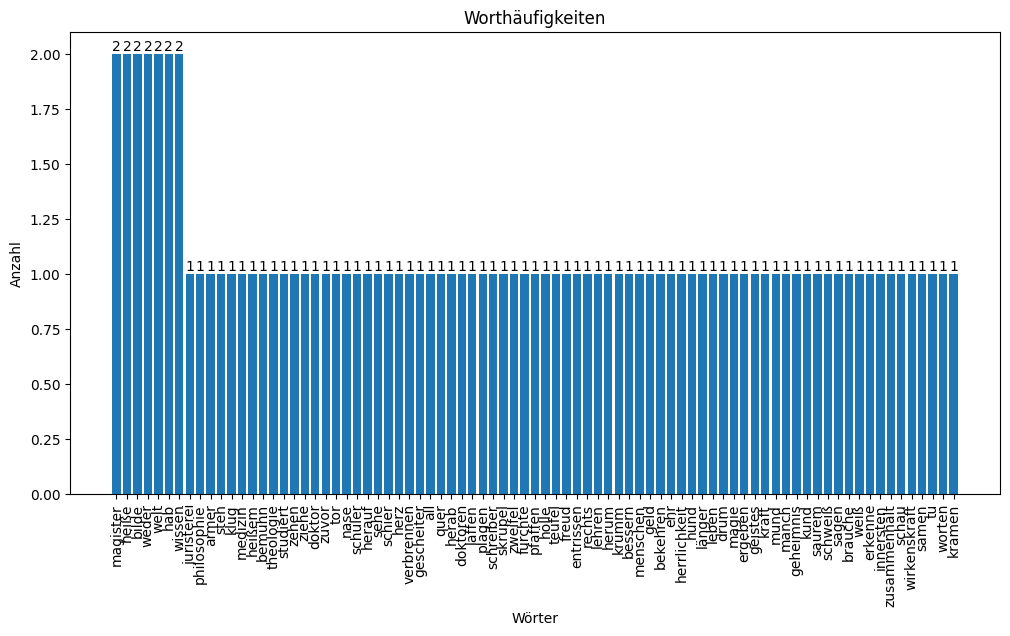

In [ ]:
# df visualisieren
plt.figure(figsize=(12, 6))
bars = plt.bar(df["Wörter"], df["Anzahl"])
for bar in bars: # einzelne Werte für jeden Bar anzeigen
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=10)
plt.title("Worthäufigkeiten")
plt.xlabel("Wörter")
plt.xticks(rotation=90)
plt.ylabel("Anzahl")
plt.show()

In [ ]:
# Häufigkeiten als Dictionary vorbereiten
# Dieser Befehl erstellt ein Dictionary aus zwei Spalten eines DataFrames (df)
word_freq = dict(zip(df["Wörter"], df["Anzahl"]))
print(word_freq)

{'magister': 2, 'heiße': 2, 'bilde': 2, 'weder': 2, 'welt': 2, 'hab': 2, 'wissen': 2, 'juristerei': 1, 'philosophie': 1, 'armer': 1, 'steh': 1, 'klug': 1, 'medizin': 1, 'heißem': 1, 'bemühn': 1, 'theologie': 1, 'studiert': 1, 'zehen': 1, 'ziehe': 1, 'doktor': 1, 'zuvor': 1, 'tor': 1, 'nase': 1, 'schüler': 1, 'herauf': 1, 'sehe': 1, 'schier': 1, 'herz': 1, 'verbrennen': 1, 'gescheiter': 1, 'all': 1, 'quer': 1, 'herab': 1, 'doktoren': 1, 'laffen': 1, 'plagen': 1, 'schreiber': 1, 'skrupel': 1, 'zweifel': 1, 'fürchte': 1, 'pfaffen': 1, 'hölle': 1, 'teufel': 1, 'freud': 1, 'entrissen': 1, 'rechts': 1, 'lehren': 1, 'herum': 1, 'krumm': 1, 'bessern': 1, 'menschen': 1, 'geld': 1, 'bekehren': 1, 'ehr': 1, 'herrlichkeit': 1, 'hund': 1, 'länger': 1, 'leben': 1, 'drum': 1, 'magie': 1, 'ergeben': 1, 'geistes': 1, 'kraft': 1, 'mund': 1, 'manch': 1, 'geheimnis': 1, 'kund': 1, 'saurem': 1, 'schweiß': 1, 'sagen': 1, 'brauche': 1, 'weiß': 1, 'erkenne': 1, 'innersten': 1, 'zusammenhält': 1, 'schau': 1, '

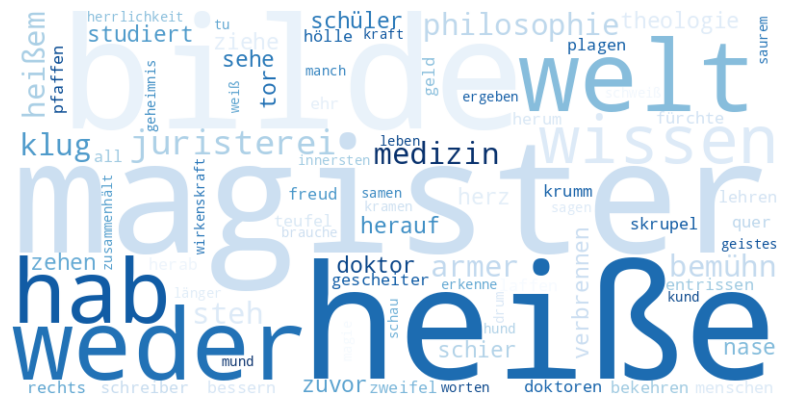

In [ ]:
# Wordcloud generieren
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    colormap="Blues"
).generate_from_frequencies(word_freq)

# Wordcloud anzeigen
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Achsen ausblenden
plt.show()